# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [102]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---- ----------------------------------- 1.3/12.8 MB 13.4 MB/s eta 0:00:01
     ------- -------------------------------- 2.4/12.8 MB 7.9 MB/s eta 0:00:02
     ---------- ----------------------------- 3.4/12.8 MB 6.3 MB/s eta 0:00:02
     ------------- -------------------------- 4.5/12.8 MB 6.1 MB/s eta 0:00:02
     ------------------ --------------------- 5.8/12.8 MB 6.0 MB/s eta 0:00:02
     --------------------- ------------------ 6.8/12.8 MB 5.8 MB/s eta 0:00:02
     ------------------------ --------------- 7.9/12.8 MB 5.8 MB/s eta 0:00:01
     ---------------------------- ----------- 9.2/12.8 MB 5.8 MB/s eta 0:00:01
     ------------------------------- -------- 10.2/12.8 MB 5.7 MB/s eta 0:00:01
     ----------------------------------- ---- 11.3/12.8 MB 5.7 MB/s eta 0:00:01
     ---------------------------------------  12.6/12.8 MB 5.7 MB/s eta 0:00:01
     ---------------------------------------- 12.8/12.8

## Importing the necessary libraries

In [1]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations
from wordcloud import WordCloud

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [7]:
# Change the display properties of pandas to max
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 50)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [105]:
# Import the first file - True.csv
true_news = pd.read_csv('True.csv')

# Import the second file - Fake.csv
fake_news = pd.read_csv('Fake.csv')

print('True news imported', len(true_news))
print('Fake news imported', len(fake_news))

True news imported 21417
Fake news imported 23523


## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [106]:
# Inspect the DataFrame with True News to understand the given data
true_news.sample(1)

,title,text,date
11383,"China, Pakistan to look at including Afghanistan in $57 billion economic corridor","BEIJING (Reuters) - China and Pakistan will look at extending their $57 billion China-Pakistan Economic Corridor to Afghanistan, Chinese Foreign Minister Wang Yi said on Tuesday, part of China s ambitious Belt and Road plan linking China with Asia, Europe and beyond. China has tried to position itself as a helpful party to promote talks between Pakistan and Afghanistan, both uneasy neighbors ever since Pakistan s independence in 1947. Their ties have been poisoned in recent years by Afghan a...","December 26, 2017"


In [107]:
# Inspect the DataFrame with Fake News to understand the given data
fake_news.sample(1)

,title,text,date
4364,Conservative Writer Calls Black Voters Hillary’s ‘Loyal Slaves’ For Not Blindly Supporting Donald Trump,"When conservatives refer to black people as slaves it totally undermines what little effort they put into trying to get their votes.But a conservative writer did exactly that in a racist article published by Mediaite on Tuesday in an attack on Lebron James and Mary J. Blige for endorsing Hillary Clinton.In the opinion piece titled LeBron James, Mary J. Blige Tell Blacks to Remain Slaves to Hillary; Vote Their Color Not Their Conscience, author Crystal Wright referenced slavery and compar...","October 4, 2016"


In [108]:
# Print the column details for True News DataFrame
true_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [109]:
# Descriptive statistics of string lengths for True News
true_news.apply(lambda x: x.apply(lambda x: len(x))).describe().round(2)

,title,text,date
count,21417.00,21417.00,21417.00
mean,64.67,2383.28,16.72
std,9.17,1684.84,1.74
min,26.00,1.00,12.00
25%,59.00,914.00,16.00
50%,64.00,2222.00,17.00
75%,70.00,3237.00,18.00
max,133.00,29781.00,19.00


In [110]:
# Print the column details for Fake News Dataframe
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [111]:
# Descriptive statistics of string lengths for Fake News
fake_news.apply(lambda x: x.apply(lambda x: len(str(x)))).describe().round(2)

,title,text,date
count,23523.00,23523.00,23523.00
mean,94.15,2534.79,13.19
std,27.71,2409.69,5.23
min,3.00,1.00,3.00
25%,77.00,1426.00,12.00
50%,90.00,2164.00,12.00
75%,105.00,3029.00,14.00
max,480.00,32759.00,388.00


In [112]:
# Print the column names of both DataFrames
print('True news columns:', true_news.columns)
print('Fake news columns:', fake_news.columns)

True news columns: Index(['title', 'text', 'date'], dtype='object')
Fake news columns: Index(['title', 'text', 'date'], dtype='object')


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [113]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true_news['news_label'] = 1

# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake_news['news_label'] = 0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [114]:
# Combine the true and fake news DataFrames into a single DataFrame
news_data = pd.concat([true_news, fake_news], axis=0)

In [115]:
# Shuffling indices for better model training
idx = np.arange(len(news_data))
np.random.shuffle(idx)

news_data = news_data.iloc[idx, :]
news_data.reset_index(drop= True, inplace= True)

In [116]:
# Display the first 5 rows of the combined DataFrame to verify the result
news_data.head()

,title,text,date,news_label
0,Trump Has Extremely Inappropriate Reaction To Being Contradicted By His Own National Security Adviser,"The majority of America has already noticed and figured it out a long time ago that Donald Trump doesn t have a measured, steady reaction to anything. Widely known for his lack of mental and emotional stability, America s new failing president continues to horrify the nation (and the world) with his over-the-top, inappropriate reactions to even the most straightforward issues and disagreements. How Trump treats members of his own team is a perfect example of this.Last month, Trump made a...","May 8, 2017",0
1,Did Hillary Clinton REALLY Break Her Toe? [VIDEO],"On Friday, freelance reporter and political consultant Michael J. Hout tweeted a photo of Hillary Clinton walking with forearm crutches at Yale Law School on Saturday. Hillary told the world that she broke her toe while walking downstairs with a cup of coffee in her hand, while she was in the UK promoting her ridiculous book What Happened , that tells the story of how it s everyone else s fault but her own that she lost the presidential election to Donald Trump. Hillary Clinton at @YaleLaw...","Oct 23, 2017",0
2,Bombs kill Pakistani soldiers hunting U.S.-Canadian family's kidnappers,"ISLAMABAD (Reuters) - Bomb blasts killed a Pakistani army officer and three soldiers searching for the kidnappers of a freed U.S.-Canadian family in a tribal region bordering Afghanistan, Pakistani and U.S. officials said. Pakistan s army said the attacks in Kurram tribal district on Sunday also wounded three soldiers during the search for those who held American Caitlan Coleman, her Canadian husband, Joshua Boyle, and their three children hostage. The family were freed on Wednesday when th...","October 16, 2017",1
3,Milo Goes Down In Flames As His Career At Breitbart Comes To A HUMILIATING End (DETAILS),"The fall of professional troll and far-right provocateur Milo Yiannopoulos continues, as he has now resigned from the place that made him a young conservative star, Breitbart News. Milo began his time at Breitbart as a tech editor, and his antics eventually got him promoted to Senior Editor. Now, all of that is over as multiple videos surfaced of him defending pederasty. Said tapes also cost him a speaking slot at the Conservative Political Action Conference (CPAC) and the deal with publishe...","February 21, 2017",0
4,Puerto Rico votes in favor of U.S. statehood amid low turnout,"SAN JUAN (Reuters) - The economically struggling U.S. island territory of Puerto Rico voted overwhelmingly on Sunday in favor of becoming the 51st state, although turnout was low and adding another star to the U.S. flag likely faces an uphill battle in Congress. A government website for the non-binding referendum, Puerto Rico’s fifth such plebiscite since 1967, showed 97 percent supported statehood. Only 23 percent of the 2.2 million eligible voters participated in the vote. Puerto Rico Gove...","June 11, 2017",1


In [117]:
# Check for consistency of length
len(news_data) == len(true_news) + len(fake_news)

True

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [118]:
# Check Presence of Null Values
news_data.isnull().sum() / len(news_data) * 100

title         0.046729
text          0.046729
date          0.093458
news_label    0.000000
dtype: float64

Percent null value <1 hence such rows are dropped

In [119]:
# Handle Rows with Null Values
news_data.dropna(axis= 0, inplace=True)
news_data.isnull().sum()

title         0
text          0
date          0
news_label    0
dtype: int64

In [120]:
len(news_data)

44898

### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [121]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
news_data['news_text'] = news_data['title'] + ' ' + news_data['text']

# Drop the irrelevant columns from the DataFrame as they are no longer needed
news_data.drop(['title', 'text', 'date'], axis= 1, inplace= True)

# Display the first 5 rows of the updated DataFrame to check the result
news_data.head()


,news_label,news_text
0,0,"Trump Has Extremely Inappropriate Reaction To Being Contradicted By His Own National Security Adviser The majority of America has already noticed and figured it out a long time ago that Donald Trump doesn t have a measured, steady reaction to anything. Widely known for his lack of mental and emotional stability, America s new failing president continues to horrify the nation (and the world) with his over-the-top, inappropriate reactions to even the most straightforward issues and disagr..."
1,0,"Did Hillary Clinton REALLY Break Her Toe? [VIDEO] On Friday, freelance reporter and political consultant Michael J. Hout tweeted a photo of Hillary Clinton walking with forearm crutches at Yale Law School on Saturday. Hillary told the world that she broke her toe while walking downstairs with a cup of coffee in her hand, while she was in the UK promoting her ridiculous book What Happened , that tells the story of how it s everyone else s fault but her own that she lost the presidential ele..."
2,1,"Bombs kill Pakistani soldiers hunting U.S.-Canadian family's kidnappers ISLAMABAD (Reuters) - Bomb blasts killed a Pakistani army officer and three soldiers searching for the kidnappers of a freed U.S.-Canadian family in a tribal region bordering Afghanistan, Pakistani and U.S. officials said. Pakistan s army said the attacks in Kurram tribal district on Sunday also wounded three soldiers during the search for those who held American Caitlan Coleman, her Canadian husband, Joshua Boyle, and ..."
3,0,"Milo Goes Down In Flames As His Career At Breitbart Comes To A HUMILIATING End (DETAILS) The fall of professional troll and far-right provocateur Milo Yiannopoulos continues, as he has now resigned from the place that made him a young conservative star, Breitbart News. Milo began his time at Breitbart as a tech editor, and his antics eventually got him promoted to Senior Editor. Now, all of that is over as multiple videos surfaced of him defending pederasty. Said tapes also cost him a speak..."
4,1,"Puerto Rico votes in favor of U.S. statehood amid low turnout SAN JUAN (Reuters) - The economically struggling U.S. island territory of Puerto Rico voted overwhelmingly on Sunday in favor of becoming the 51st state, although turnout was low and adding another star to the U.S. flag likely faces an uphill battle in Congress. A government website for the non-binding referendum, Puerto Rico’s fifth such plebiscite since 1967, showed 97 percent supported statehood. Only 23 percent of the 2.2 mill..."


## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [122]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = pd.DataFrame()

# Add 'news_label' column to the new dataframe for topic identification
df_clean['news_label'] = news_data['news_label'].copy()

df_clean.head()

,news_label
0,0
1,0
2,1
3,0
4,1


#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [123]:
def preprocess_text(text):

# Convert to lower case
    text = text.lower()

# Remove text in square bracket    
    text = re.sub(r'\[.*?\]', r'', text)    

# Shorten abbreviations
    shorten = lambda x: x.group().replace('.', '')
    text = re.sub(r"\b([a-z]\.)+[a-z]?\b\.?", shorten, text)

# Remove punctuations
    text = re.sub(r'[?.,!;:\-]', r' ', text)

# Remove quotation marks    
    text = re.sub(r'[“”‘’\'"]', r'', text)

# Remove text with numbers
    text = re.sub(r'.\d+.', r' ', text)

# Remove other special characters like $, #
    text = re.sub(r'[^a-zA-Z]+', r' ', text)

    text = text.strip()

    return text


#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [124]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame
df_clean['news_text'] = news_data['news_text'].progress_apply(lambda x: preprocess_text(x))

df_clean.head()

100%|██████████| 44898/44898 [00:06<00:00, 7179.55it/s]


,news_label,news_text
0,0,trump has extremely inappropriate reaction to being contradicted by his own national security adviser the majority of america has already noticed and figured it out a long time ago that donald trump doesn t have a measured steady reaction to anything widely known for his lack of mental and emotional stability america s new failing president continues to horrify the nation and the world with his over the top inappropriate reactions to even the most straightforward issues and disagreements how...
1,0,did hillary clinton really break her toe on friday freelance reporter and political consultant michael j hout tweeted a photo of hillary clinton walking with forearm crutches at yale law school on saturday hillary told the world that she broke her toe while walking downstairs with a cup of coffee in her hand while she was in the uk promoting her ridiculous book what happened that tells the story of how it s everyone else s fault but her own that she lost the presidential election to donald t...
2,1,bombs kill pakistani soldiers hunting us canadian familys kidnappers islamabad reuters bomb blasts killed a pakistani army officer and three soldiers searching for the kidnappers of a freed us canadian family in a tribal region bordering afghanistan pakistani and us officials said pakistan s army said the attacks in kurram tribal district on sunday also wounded three soldiers during the search for those who held american caitlan coleman her canadian husband joshua boyle and their three child...
3,0,milo goes down in flames as his career at breitbart comes to a humiliating end details the fall of professional troll and far right provocateur milo yiannopoulos continues as he has now resigned from the place that made him a young conservative star breitbart news milo began his time at breitbart as a tech editor and his antics eventually got him promoted to senior editor now all of that is over as multiple videos surfaced of him defending pederasty said tapes also cost him a speaking slot a...
4,1,puerto rico votes in favor of us statehood amid low turnout san juan reuters the economically struggling us island territory of puerto rico voted overwhelmingly on sunday in favor of becoming the t state although turnout was low and adding another star to the us flag likely faces an uphill battle in congress a government website for the non binding referendum puerto ricos fifth such plebiscite since showed percent supported statehood only percent of the million eligible voters participated i...


### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [125]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
nlp_pos = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def word_filter(text):
    text = ' '.join([tok.lemma_ for tok in nlp_pos(text) 
                     if tok.tag_ in ['NN', 'NNS'] and tok.lemma_ not in stopwords.words('english')])
    
    return text

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [126]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
df_clean['news_text_lemmatized'] = df_clean['news_text'].progress_apply(lambda x: word_filter(str(x)))
df_clean.head()

100%|██████████| 44898/44898 [14:43<00:00, 50.82it/s]


,news_label,news_text,news_text_lemmatized
0,0,trump has extremely inappropriate reaction to being contradicted by his own national security adviser the majority of america has already noticed and figured it out a long time ago that donald trump doesn t have a measured steady reaction to anything widely known for his lack of mental and emotional stability america s new failing president continues to horrify the nation and the world with his over the top inappropriate reactions to even the most straightforward issues and disagreements how...,trump reaction security adviser majority time reaction anything lack president nation world reaction issue disagreement trump member team example month trump remark altitude area defense missile defense system trump statement basis reality security adviser mcmaster statement mcmaster government cost thaad care trump sh adviser one phone trump official mcmaster counterpart threat country missile defense system policy official trump mcmaster phone call effort share trump reaction ego time some...
1,0,did hillary clinton really break her toe on friday freelance reporter and political consultant michael j hout tweeted a photo of hillary clinton walking with forearm crutches at yale law school on saturday hillary told the world that she broke her toe while walking downstairs with a cup of coffee in her hand while she was in the uk promoting her ridiculous book what happened that tells the story of how it s everyone else s fault but her own that she lost the presidential election to donald t...,toe freelance reporter consultant photo crutch school world toe cup coffee hand book story everyone fault election today brace pic twitter com beacon look story toe bit interview uranium story evidence selling uranium return contribution fund watch
2,1,bombs kill pakistani soldiers hunting us canadian familys kidnappers islamabad reuters bomb blasts killed a pakistani army officer and three soldiers searching for the kidnappers of a freed us canadian family in a tribal region bordering afghanistan pakistani and us officials said pakistan s army said the attacks in kurram tribal district on sunday also wounded three soldiers during the search for those who held american caitlan coleman her canadian husband joshua boyle and their three child...,bomb soldier family bomb blast army officer soldier kidnapper family region official army attack soldier search husband child family army tire vehicle family rescue intelligence authority government baseer device bomb disposal squad route bomb army team site responsibility personnel kidnapper citizen family ambassador statement military response operation family family rescue moment relation year assertion militant soil coleman boyle militant army captor family year time militant general arm...
3,0,milo goes down in flames as his career at breitbart comes to a humiliating end details the fall of professional troll and far right provocateur milo yiannopoulos continues as he has now resigned from the place that made him a young conservative star breitbart news milo began his time at breitbart as a tech editor and his antics eventually got him promoted to senior editor now all of that is over as multiple videos surfaced of him defending pederasty said tapes also cost him a speaking slot a...,flame career breitbart end fall troll provocateur place time breitbart tech editor antic editor video pederasty tape slot action conference deal publisher schuster book milo statement following resignation news choice word colleague reporting today decision assertion one resignation dozen breitbart employee site employ course idea milo kind bastion thought troll statement voice debate topic university press tech industry milo morning decision editor tech resignation medium company breitbart ...
4,1,puerto rico votes in favor of us statehood amid low turnout san juan reuters the economically struggling us island territory of puerto rico voted overwhelmingly on sunday in favor of becom

### Save the Cleaned data as a csv file (Recommended)

In [127]:
# Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("clean_df.csv")

In [8]:
# Check the first few rows of the DataFrame
df_clean = pd.read_csv("clean_df.csv")
df_clean.head()

,news_label,news_text,news_text_lemmatized
0,0,trump has extremely inappropriate reaction to being contradicted by his own national security adviser the majority of america has already noticed and figured it out a long time ago that donald trump doesn t have a measured steady reaction to anything widely known for his lack of mental and emotional stability america s new failing president continues to horrify the nation and the world with his over the top inappropriate reactions to even the most straightforward issues and disagreements how...,trump reaction security adviser majority time reaction anything lack president nation world reaction issue disagreement trump member team example month trump remark altitude area defense missile defense system trump statement basis reality security adviser mcmaster statement mcmaster government cost thaad care trump sh adviser one phone trump official mcmaster counterpart threat country missile defense system policy official trump mcmaster phone call effort share trump reaction ego time some...
1,0,did hillary clinton really break her toe on friday freelance reporter and political consultant michael j hout tweeted a photo of hillary clinton walking with forearm crutches at yale law school on saturday hillary told the world that she broke her toe while walking downstairs with a cup of coffee in her hand while she was in the uk promoting her ridiculous book what happened that tells the story of how it s everyone else s fault but her own that she lost the presidential election to donald t...,toe freelance reporter consultant photo crutch school world toe cup coffee hand book story everyone fault election today brace pic twitter com beacon look story toe bit interview uranium story evidence selling uranium return contribution fund watch
2,1,bombs kill pakistani soldiers hunting us canadian familys kidnappers islamabad reuters bomb blasts killed a pakistani army officer and three soldiers searching for the kidnappers of a freed us canadian family in a tribal region bordering afghanistan pakistani and us officials said pakistan s army said the attacks in kurram tribal district on sunday also wounded three soldiers during the search for those who held american caitlan coleman her canadian husband joshua boyle and their three child...,bomb soldier family bomb blast army officer soldier kidnapper family region official army attack soldier search husband child family army tire vehicle family rescue intelligence authority government baseer device bomb disposal squad route bomb army team site responsibility personnel kidnapper citizen family ambassador statement military response operation family family rescue moment relation year assertion militant soil coleman boyle militant army captor family year time militant general arm...
3,0,milo goes down in flames as his career at breitbart comes to a humiliating end details the fall of professional troll and far right provocateur milo yiannopoulos continues as he has now resigned from the place that made him a young conservative star breitbart news milo began his time at breitbart as a tech editor and his antics eventually got him promoted to senior editor now all of that is over as multiple videos surfaced of him defending pederasty said tapes also cost him a speaking slot a...,flame career breitbart end fall troll provocateur place time breitbart tech editor antic editor video pederasty tape slot action conference deal publisher schuster book milo statement following resignation news choice word colleague reporting today decision assertion one resignation dozen breitbart employee site employ course idea milo kind bastion thought troll statement voice debate topic university press tech industry milo morning decision editor tech resignation medium company breitbart ...
4,1,puerto rico votes in favor of us statehood amid low turnout san juan reuters the economically struggling us island territory of puerto rico voted overwhelmingly on sunday in favor of becom

In [9]:
# Check the dimensions of the DataFrame
df_clean.shape

(44898, 3)

In [10]:
# Check the number of non-null entries and data types of each column
df_clean.isnull().sum()

news_label              0
news_text               0
news_text_lemmatized    3
dtype: int64

In [11]:
df_clean.dropna(axis=0, inplace=True)
df_clean.isnull().sum()

news_label              0
news_text               0
news_text_lemmatized    0
dtype: int64

In [12]:
# Word counts descriptive statistics for each columns
df_clean[['news_text', 'news_text_lemmatized']].apply(lambda x: x.apply(lambda x: len(x))).describe().round(2)

,news_text,news_text_lemmatized
count,44895.00,44895.00
mean,2441.03,719.69
std,1923.11,591.42
min,8.00,3.00
25%,1266.00,364.00
50%,2191.00,630.00
75%,3074.00,915.00
max,31560.00,10361.00


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [ ]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_clean, train_size=0.7, stratify=df_clean['news_label'], random_state= 11)

print('Train/test split shapes')
print(df_train.shape)
print(df_test.shape)

print('\nTrain/test split label proportions')
print(df_train['news_label'].value_counts(normalize= True))
print(df_test['news_label'].value_counts(normalize= True))

Train/test split shapes
(31426, 3)
(13469, 3)

Train/test split label proportions
news_label
0    0.522943
1    0.477057
Name: proportion, dtype: float64
news_label
0    0.522979
1    0.477021
Name: proportion, dtype: float64


## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [14]:
# Check columns names
df_train.columns

Index(['news_label', 'news_text', 'news_text_lemmatized'], dtype='object')

In [15]:
# Add a new column to calculate the character length of cleaned news text
df_train['news_text_len'] = df_train['news_text'].apply(lambda x: len(x))

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
df_train['news_text_lemm_len'] = df_train['news_text_lemmatized'].apply(lambda x: len(x))

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

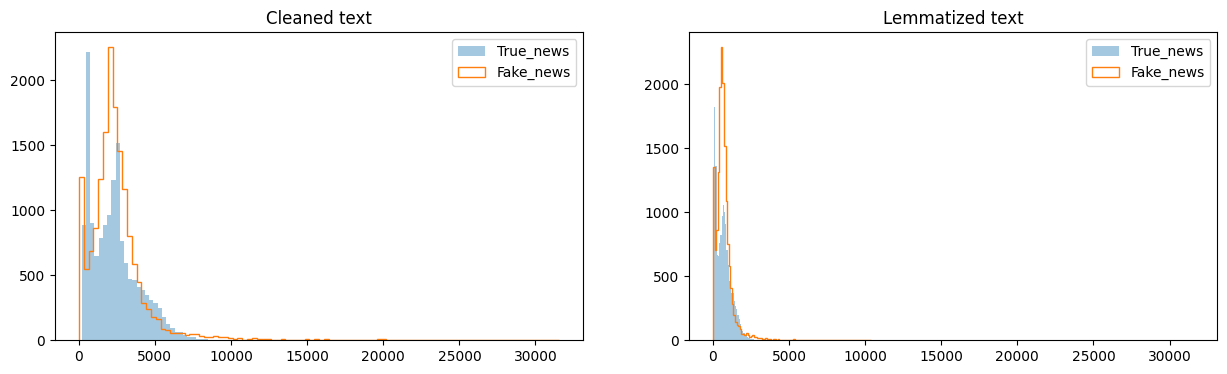

In [16]:
# Create a histogram plot to visualise character lengths
bins= 100
fig, axes = plt.subplots(1, 2, sharex= True, figsize=(15, 4))

# Add histogram for cleaned news text
for ax, col, label in zip(axes, ['news_text_len', 'news_text_lemm_len'], ['Cleaned text', 'Lemmatized text']):
    
    ax.hist(df_train.loc[df_train['news_label']==1, col], 
            bins= bins, alpha= 0.4, label='True_news')

    ax.hist(df_train.loc[df_train['news_label']==0, col], 
            bins= bins, label='Fake_news', histtype= 'step')

    ax.set_title(f'{label}')
    ax.legend()
    
# Add histogram for lemmatized news text with POS tags removed



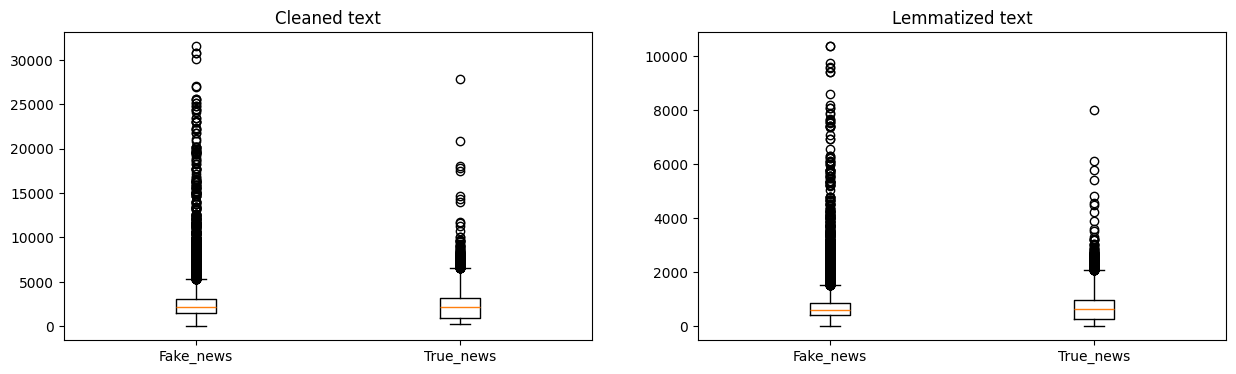

In [17]:
fig, axes = plt.subplots(1, 2, sharex= True, figsize=(15, 4))

plt.xticks()

# Add histogram for cleaned news text
for ax, col, label in zip(axes, ['news_text_len', 'news_text_lemm_len'], ['Cleaned text', 'Lemmatized text']):
    
    ax.boxplot([df_train.loc[df_train['news_label']==val, col].values for val in [0, 1]])
    
    ax.set_xticks([1, 2], ['Fake_news', 'True_news'])
    
    ax.set_title(f'{label}')
    
# Add histogram for lemmatized news text with POS tags removed

plt.show()

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

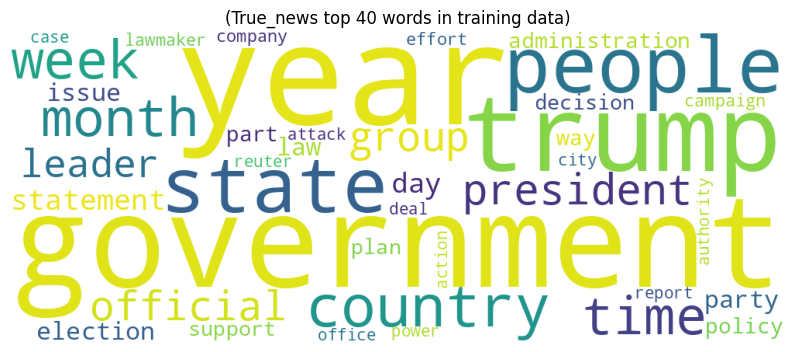

In [19]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text

# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_news = df_train.loc[df_train['news_label']==1, 'news_text_lemmatized']
true_string = ' '.join(true_news)

# Generate word cloud for True News
wordcloud_true = WordCloud(width=1000, height=400, max_words=40, background_color="white").generate(true_string)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_true, interpolation=None)
plt.axis("off")
plt.title('(True_news top 40 words in training data)')
plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

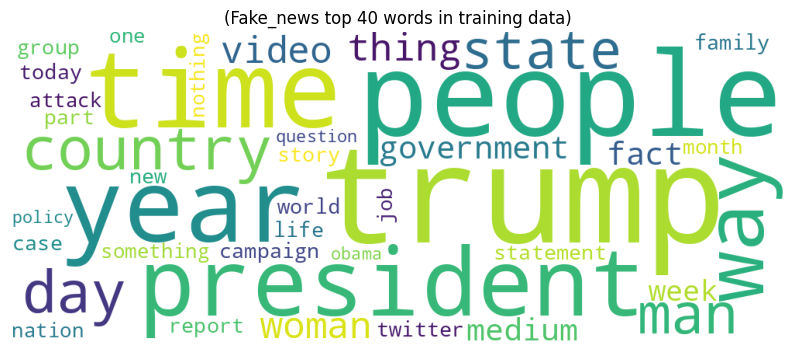

In [20]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
fake_news = df_train.loc[df_train['news_label']==0, 'news_text_lemmatized']
fake_string = ' '.join(fake_news)

# Generate word cloud for Fake News
wordcloud_fake = WordCloud(width=1000, height=400, max_words=40, background_color='white').generate(fake_string)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_fake, interpolation=None)
plt.axis("off")
plt.title('(Fake_news top 40 words in training data)')
plt.show()

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [21]:
# Write a function to get the specified top n-grams
def get_ngrams(tx_list, ngrams, topn=10):
    count_vec = CountVectorizer(ngram_range=(ngrams, ngrams))
    model = count_vec.fit_transform(tx_list)
    word_freq = np.array(model.sum(axis=0)).reshape(-1)
    
    return pd.Series(word_freq, index= count_vec.get_feature_names_out()).sort_values(ascending= False).head(topn)

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [22]:
# Handle NaN values in the text data
df_train.isnull().sum()

news_label              0
news_text               0
news_text_lemmatized    0
news_text_len           0
news_text_lemm_len      0
dtype: int64

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams in True News (Train Data):
trump         21771
year          15940
state         14984
government    14073
people        10835
election      10593
country        9698
official       9275
party          7754
campaign       7709
dtype: int64


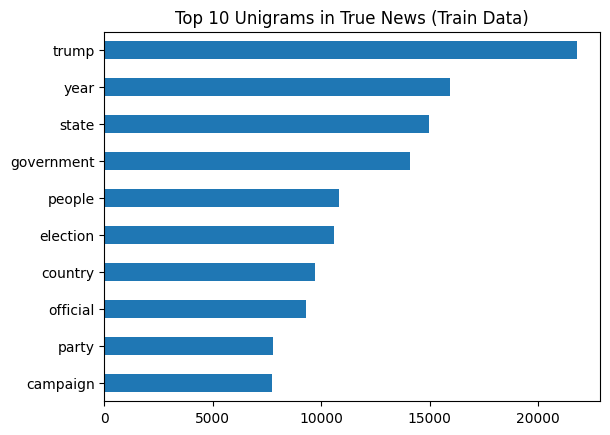

In [23]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
tx_list = df_train.loc[df_train['news_label']==1, 'news_text_lemmatized']
ngrams = get_ngrams(tx_list, 1)

print("Top 10 Unigrams in True News (Train Data):")
print(ngrams)

ngrams.sort_values().plot.barh(title= "Top 10 Unigrams in True News (Train Data)")
plt.show()

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in True News (Train Data):
news conference         960
trump campaign          921
trump administration    785
tax reform              781
climate change          741
request comment         718
security force          706
percent percent         688
intelligence agency     649
tax cut                 633
dtype: int64


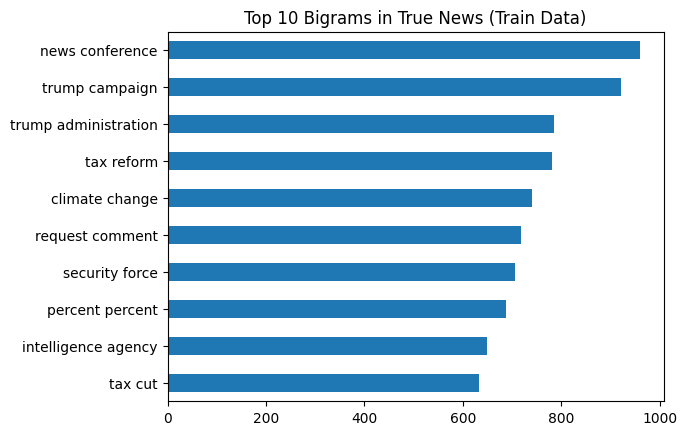

In [24]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
tx_list = df_train.loc[df_train['news_label']==1, 'news_text_lemmatized']
ngrams = get_ngrams(tx_list, 2)

print("Top 10 Bigrams in True News (Train Data):")
print(ngrams)

ngrams.sort_values().plot.barh(title= "Top 10 Bigrams in True News (Train Data)")
plt.show()

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in True News (Train Data):
official condition anonymity       224
tax rate percent                   173
article part staff                 124
involvement creation production    124
staff involvement creation         124
part staff involvement             124
state department official          117
rate percent percent               113
use email server                   110
income tax rate                     86
dtype: int64


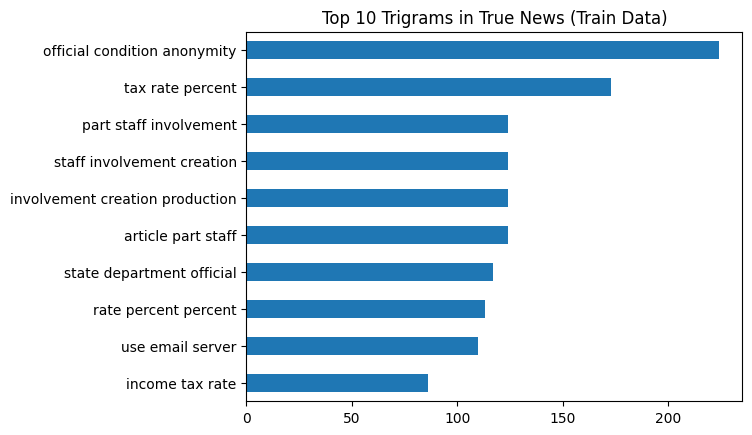

In [25]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
tx_list = df_train.loc[df_train['news_label']==1, 'news_text_lemmatized']
ngrams = get_ngrams(tx_list, 3)

print("Top 10 Trigrams in True News (Train Data):")
print(ngrams)

ngrams.sort_values().plot.barh(title= "Top 10 Trigrams in True News (Train Data)")
plt.show()

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams in Fake News (Train Data):
trump        37426
people       19002
year         13501
time         12298
president    10861
image        10117
state         9369
video         8562
woman         8229
country       8186
dtype: int64


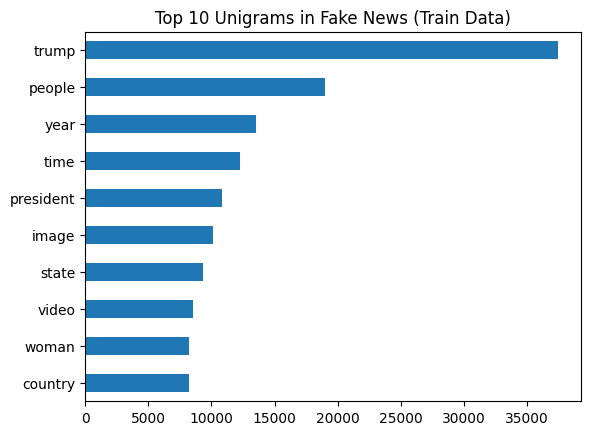

In [26]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
tx_list = df_train.loc[df_train['news_label']==0, 'news_text_lemmatized']
ngrams = get_ngrams(tx_list, 1)

print("Top 10 Unigrams in Fake News (Train Data):")
print(ngrams)

ngrams.sort_values().plot.barh(title= "Top 10 Unigrams in Fake News (Train Data)")
plt.show()

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in Fake News (Train Data):
twitter com        2749
getty image        2318
pic twitter        2163
trump supporter    1539
century wire       1318
trump campaign     1231
police officer     1207
image getty        1187
law enforcement    1158
donald trump        999
dtype: int64


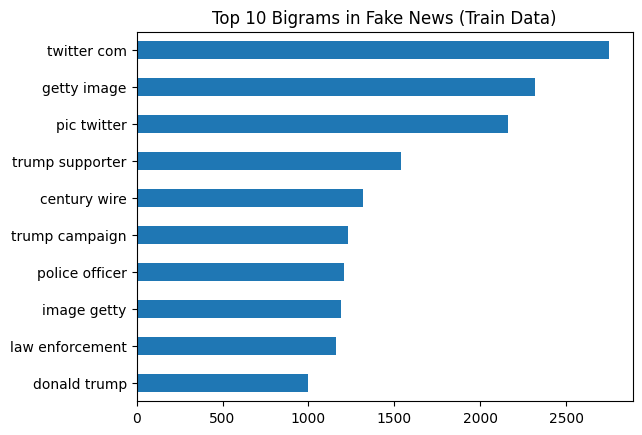

In [27]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
tx_list = df_train.loc[df_train['news_label']==0, 'news_text_lemmatized']
ngrams = get_ngrams(tx_list, 2)

print("Top 10 Bigrams in Fake News (Train Data):")
print(ngrams)

ngrams.sort_values().plot.barh(title= "Top 10 Bigrams in Fake News (Train Data)")
plt.show()

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in Fake News (Train Data):
pic twitter com            1557
image getty image          1159
news century wire           606
video screen capture        523
member ire tv               523
image video screen          502
image screen capture        359
chip somodevilla getty      287
somodevilla getty image     283
youtube com watch           282
dtype: int64


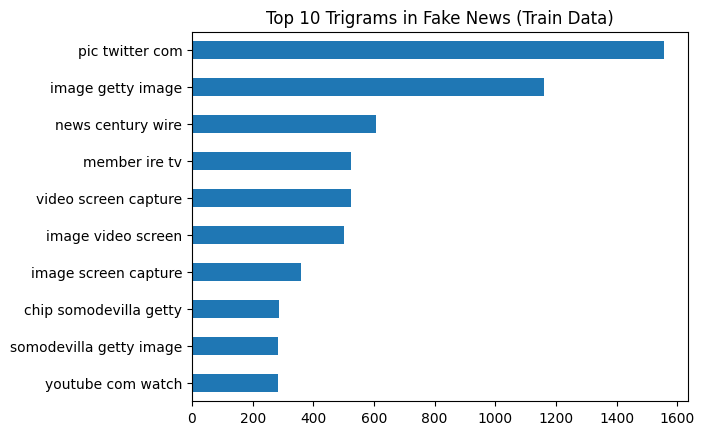

In [28]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
tx_list = df_train.loc[df_train['news_label']==0, 'news_text_lemmatized']
ngrams = get_ngrams(tx_list, 3)

print("Top 10 Trigrams in Fake News (Train Data):")
print(ngrams)

ngrams.sort_values().plot.barh(title= "Top 10 Trigrams in Fake News (Train Data)")
plt.show()

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [29]:
# Check columns
df_test.columns

Index(['news_label', 'news_text', 'news_text_lemmatized'], dtype='object')

In [30]:
# Add a new column to calculate the character length of cleaned news text
df_test['news_text_len'] = df_test['news_text'].apply(lambda x: len(x))

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
df_test['news_text_lemm_len'] = df_test['news_text_lemmatized'].apply(lambda x: len(x))

##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

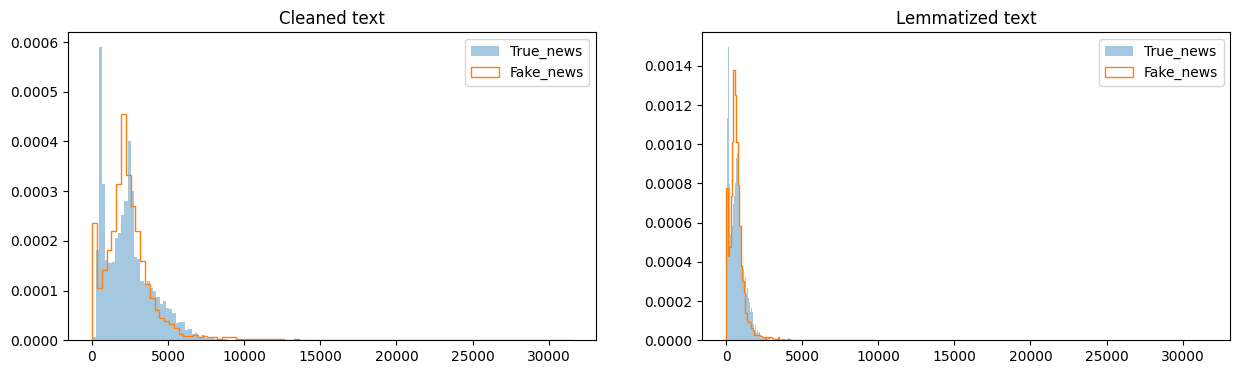

In [31]:
# Create a histogram plot to visualise character lengths
bins= 100
fig, axes = plt.subplots(nrows=1, ncols=2, sharex= True, figsize=(15, 4))

# Add histogram for cleaned news text
for ax, col, label in zip(axes, ['news_text_len', 'news_text_lemm_len'], ['Cleaned text', 'Lemmatized text']):
    
    ax.hist(df_test.loc[df_test['news_label']==1, col], 
            bins= bins, density= True, alpha=0.4, label= 'True_news')
    
    ax.hist(df_test.loc[df_test['news_label']==0, col], 
            bins= bins, density= True, histtype='step', label= 'Fake_news')
    
    ax.set_title(f'{label}')
    ax.legend()

# Add histogram for lemmatized news text with POS tags removed


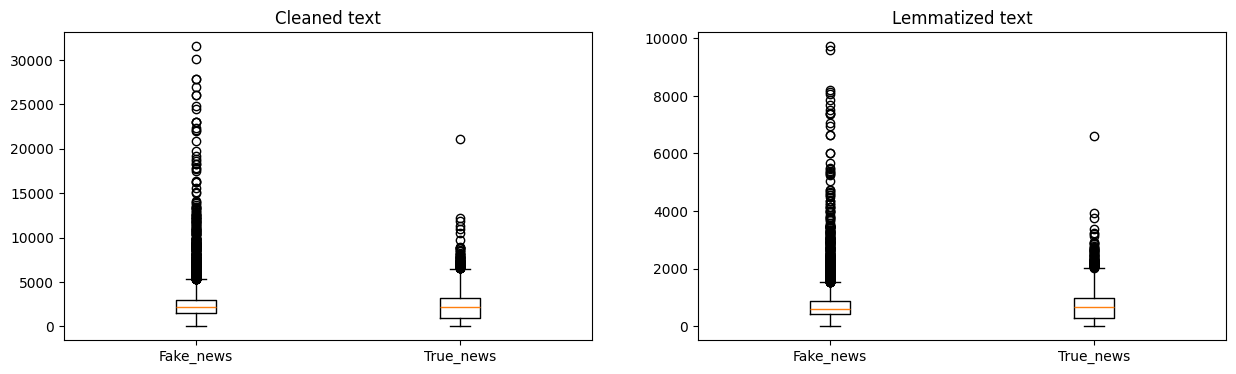

In [32]:
fig, axes = plt.subplots(1, 2, sharex= True, figsize=(15, 4))

plt.xticks()

# Add boxplot for cleaned news text
for ax, col, label in zip(axes, ['news_text_len', 'news_text_lemm_len'], ['Cleaned text', 'Lemmatized text']):
    
    ax.boxplot([df_test.loc[df_test['news_label']==val, col].values for val in [0, 1]])

    ax.set_xticks([1, 2], ['Fake_news', 'True_news'])
    
    ax.set_title(f'{label}')
    
# Add boxplot for lemmatized news text with POS tags removed

plt.show()

### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

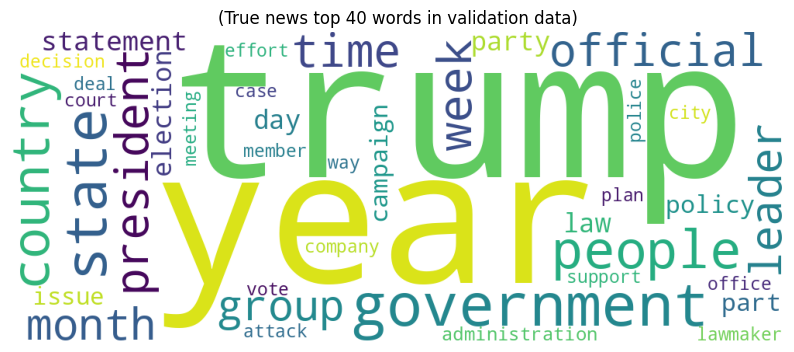

In [33]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text
true_news = df_test.loc[df_test['news_label']==1, 'news_text_lemmatized']
true_string = ' '.join(true_news)

# Generate word cloud for True News
wordcloud_true = WordCloud(width=1000, height=400, max_words=40, background_color='white').generate(true_string)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_true, interpolation=None)
plt.axis('off')
plt.title('(True news top 40 words in validation data)')
plt.show()

##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

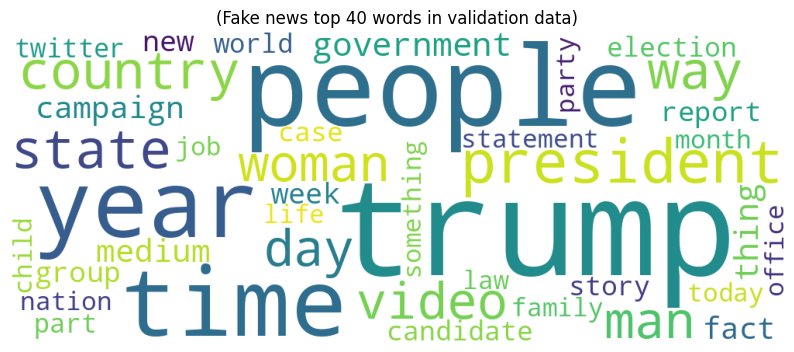

In [34]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text
fake_news = df_test.loc[df_test['news_label']==0, 'news_text_lemmatized']
fake_string = ' '.join(fake_news)

# Generate word cloud for Fake News
wordcloud_true = WordCloud(width=1000, height=400, max_words=40, background_color='white').generate(fake_string)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_true, interpolation=None)
plt.axis('off')
plt.title('(Fake news top 40 words in validation data)')
plt.show()

### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [154]:
# Write a function to get the specified top n-grams
def get_ngrams(tx_list, ngrams, topn=10):
    count_vec = CountVectorizer(ngram_range=(ngrams, ngrams))
    model = count_vec.fit_transform(tx_list)
    word_freq = np.array(model.sum(axis=0)).reshape(-1)
    
    return pd.Series(word_freq, index= count_vec.get_feature_names_out()).sort_values(ascending= False).head(topn)

##### 5.3.2 Handle the NaN values

In [35]:
## First handle NaN values in the text data
df_test.isnull().sum()

news_label              0
news_text               0
news_text_lemmatized    0
news_text_len           0
news_text_lemm_len      0
dtype: int64

### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

Top 10 Unigrams in True News (Validation Data):
trump         9553
year          6929
state         6504
government    6110
people        4528
election      4528
country       4123
official      4019
leader        3358
campaign      3342
dtype: int64


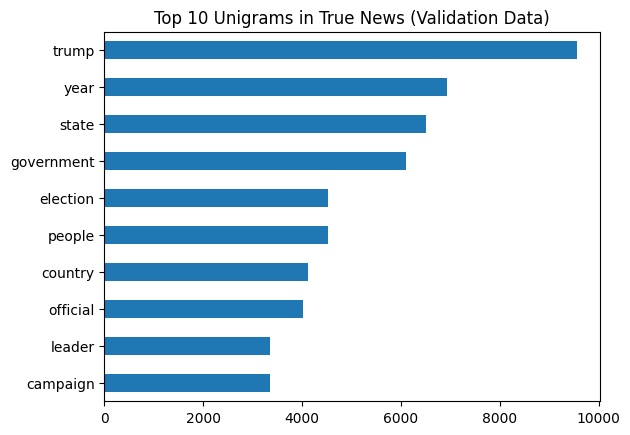

In [36]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
tx_list = df_test.loc[df_test['news_label']==1, 'news_text_lemmatized']
ngrams = get_ngrams(tx_list, 1)

print("Top 10 Unigrams in True News (Validation Data):")
print(ngrams)

ngrams.sort_values().plot.barh(title="Top 10 Unigrams in True News (Validation Data)")
plt.show()

##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

Top 10 Bigrams in True News (Validation Data):
news conference         422
trump campaign          385
trump administration    363
percent percent         327
request comment         318
security force          294
climate change          289
right group             279
intelligence agency     272
tax reform              246
dtype: int64


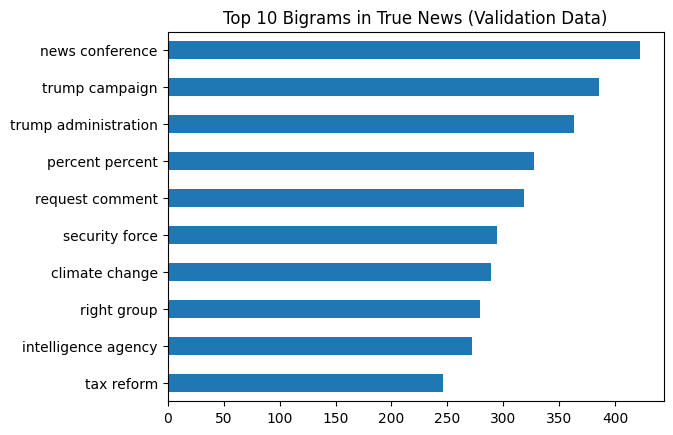

In [37]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
tx_list = df_test.loc[df_test['news_label']==1, 'news_text_lemmatized']
ngrams = get_ngrams(tx_list, 2)

print("Top 10 Bigrams in True News (Validation Data):")
print(ngrams)

ngrams.sort_values().plot.barh(title="Top 10 Bigrams in True News (Validation Data)")
plt.show()

##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

Top 10 Trigrams in True News (Validation Data):
official condition anonymity       113
tax rate percent                    64
state department official           58
percent percent percent             57
article part staff                  56
part staff involvement              56
involvement creation production     56
staff involvement creation          56
use email server                    48
rate percent percent                46
dtype: int64


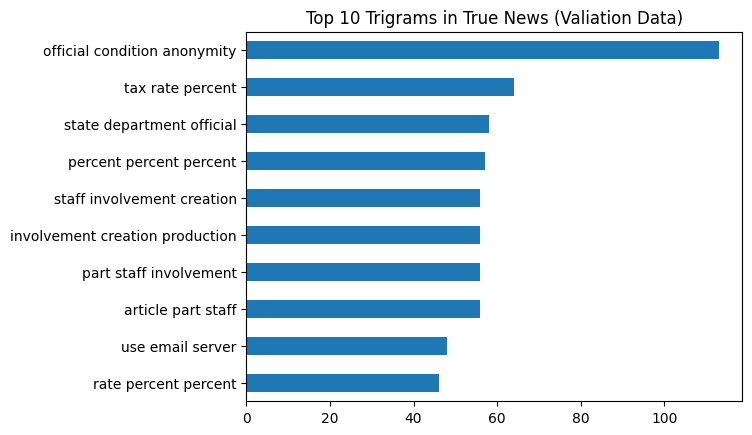

In [38]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
tx_list = df_test.loc[df_test['news_label']==1, 'news_text_lemmatized']
ngrams = get_ngrams(tx_list, 3)

print("Top 10 Trigrams in True News (Validation Data):")
print(ngrams)

ngrams.sort_values().plot.barh(title="Top 10 Trigrams in True News (Valiation Data)")
plt.show()

### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

Top 10 Unigrams in Fake News (Validation Data):
trump        15639
people        7896
year          5778
time          5041
president     4574
image         4379
state         4368
woman         3741
video         3582
campaign      3561
dtype: int64


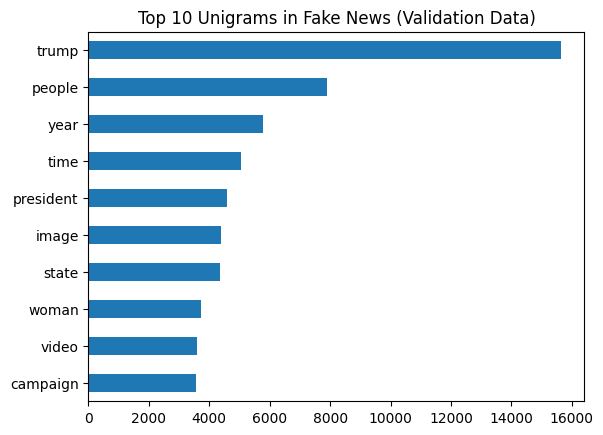

In [39]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
tx_list = df_test.loc[df_test['news_label']==0, 'news_text_lemmatized']
ngrams = get_ngrams(tx_list, 1)

print("Top 10 Unigrams in Fake News (Validation Data):")
print(ngrams)

ngrams.sort_values().plot.barh(title="Top 10 Unigrams in Fake News (Validation Data)")
plt.show()

##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

Top 10 Bigrams in Fake News (Validation Data):
twitter com        1114
getty image        1055
pic twitter         876
trump supporter     717
police officer      558
century wire        548
image getty         542
trump campaign      539
law enforcement     516
screen capture      407
dtype: int64


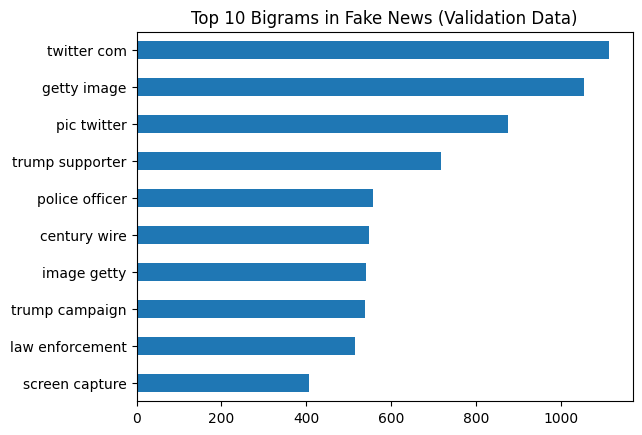

In [40]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
tx_list = df_test.loc[df_test['news_label']==0, 'news_text_lemmatized']
ngrams = get_ngrams(tx_list, 2)

print("Top 10 Bigrams in Fake News (Validation Data):")
print(ngrams)

ngrams.sort_values().plot.barh(title="Top 10 Bigrams in Fake News (Validation Data)")
plt.show()

##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

Top 10 Trigrams in Fake News (Validation Data):
pic twitter com            614
image getty image          530
news century wire          255
member ire tv              220
video screen capture       208
image video screen         198
image screen capture       175
chip somodevilla getty     142
somodevilla getty image    141
image chip somodevilla     131
dtype: int64


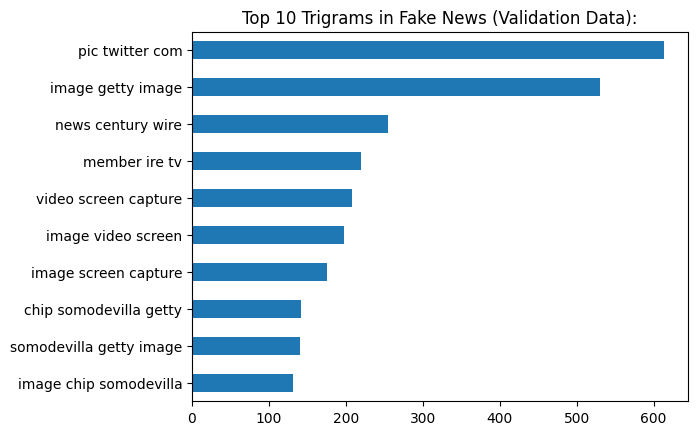

In [41]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
tx_list = df_test.loc[df_test['news_label']==0, 'news_text_lemmatized']
ngrams = get_ngrams(tx_list, 3)

print("Top 10 Trigrams in Fake News (Validation Data):")
print(ngrams)

ngrams.sort_values().plot.barh(title="Top 10 Trigrams in Fake News (Validation Data):")
plt.show()

## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [ ]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
from gensim import downloader

g300_w2v = downloader.load('word2vec-google-news-300')

# Extract the raw vectors
vectors = g300_w2v.vectors  
print(vectors.shape)  


(3000000, 300)


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [163]:
# Function to extract Frobenius norm of sentence word vectors
def mat_norm(text):
    V = np.array([g300_w2v[word] if word in g300_w2v.key_to_index else np.zeros(300) 
              for word in text.split()])
    return np.linalg.norm(V)

In [164]:
def vec_sum(text):
    V = np.array([g300_w2v[word] if word in g300_w2v.key_to_index else np.zeros(300) 
              for word in text.split()]).sum(axis= 0)
    return V

In [165]:
def word_dot(text):
    V = np.array([g300_w2v[word] if word in g300_w2v.key_to_index else np.zeros(300) 
            for word in text.split()])
    Vsum = V.sum(axis=1)
    if np.all(Vsum == 0):
        return np.zeros(300)
    else:
        return np.dot(Vsum, V)

In [166]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
scaler_std = StandardScaler()
tfidf = TfidfVectorizer()
counts = CountVectorizer()

X_train, X_test= [], []

# Extract lengths of lemmatized text
X_train = np.c_[df_train['news_text_lemm_len'].values]
X_test = np.c_[df_test['news_text_lemm_len'].values]

# Extract sentence vectors for lemmatized text
V_train = []
for tx in tqdm(df_train['news_text_lemmatized']):
    V_train.append(vec_sum(tx))
V_train = np.array(V_train).reshape(len(df_train), 300)

V_test = []
for tx in tqdm(df_test['news_text_lemmatized']):
    V_test.append(vec_sum(tx))
V_test = np.array(V_test).reshape(len(df_test), 300)

# Extract normalized Frobenius norm of sentence matrix
N_train = []
for tx in tqdm(df_train['news_text_lemmatized']):
    N_train.append(mat_norm(tx))
N_train = np.c_[np.array(N_train)]
# N_train = scaler_std.fit_transform(N_train)

N_test = []
for tx in tqdm(df_test['news_text_lemmatized']):
    N_test.append(mat_norm(tx))
N_test = np.c_[np.array(N_test)]
# N_test = scaler_std.transform(N_test)

# Extract cosine similarity of words with sentence
D_train = []
for tx in tqdm(df_train['news_text_lemmatized']):
    D_train.append(word_dot(tx))
D_train = np.array(D_train)

D_test = []
for tx in tqdm(df_test['news_text_lemmatized']):
    D_test.append(word_dot(tx))
D_test = np.array(D_test)

# Extract tfidf of entity types in a sentence
ENT_train = []
ent_train = df_train['news_text_lemmatized'].progress_apply(lambda x: ' '.join([tok.ent_type_ for tok in nlp(x)]))
count_train = counts.fit_transform(ent_train)
ENT_train = count_train.toarray()

ENT_test = []
ent_test = df_test['news_text_lemmatized'].progress_apply(lambda x: ' '.join([tok.ent_type_ for tok in nlp(x)]))
count_test = counts.fit_transform(ent_test)
ENT_test = count_test.toarray()

# Stack feature variables 
X_train = np.hstack([X_train, N_train, ENT_train, D_train, V_train])
X_test = np.hstack([X_test, N_test, ENT_test, D_test, V_test])

## Extract the target variable for the training data and validation data
y_train = np.c_[df_train['news_label']]
y_test = np.c_[df_test['news_label']]

print(X_train.shape)
print(X_test.shape)

100%|██████████| 13469/13469 [01:27<00:00, 153.09it/s]


(31426, 620)
(13469, 620)


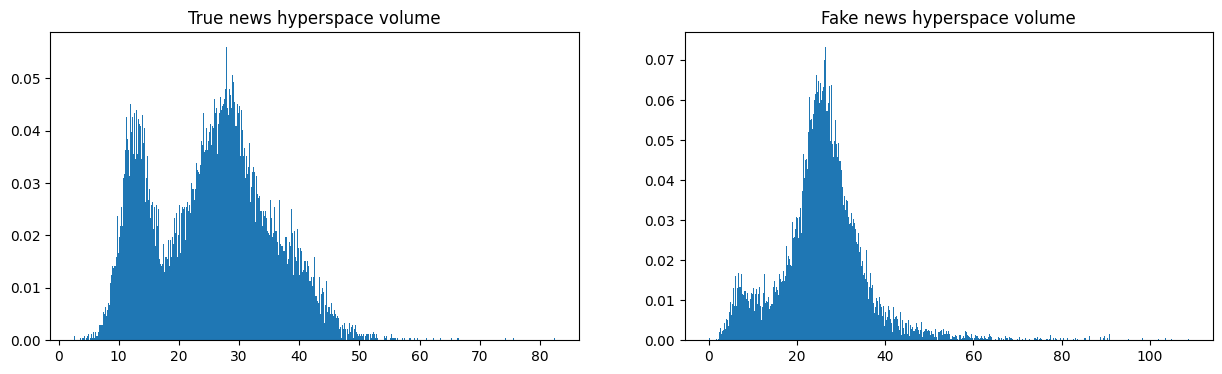

In [167]:
# Visualizing standardized sentence matrix norms for true and fake news
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1).hist(N_train[df_train['news_label']==1], density= True, bins=500)
plt.title('True news hyperspace volume')

plt.subplot(1, 2, 2).hist(N_train[df_train['news_label']==0], density= True, bins=500)
plt.title('Fake news hyperspace volume')

plt.show()

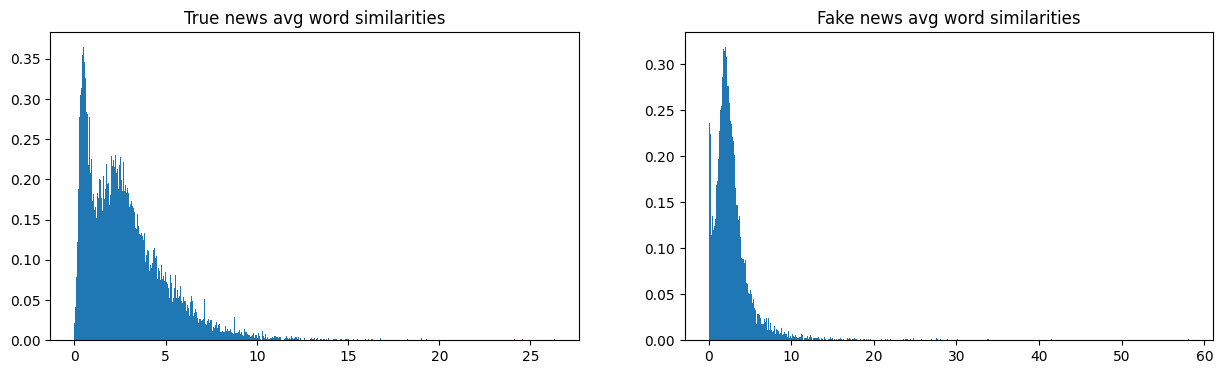

In [168]:
# # Visualizing avg of dot products for true and fake news
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1).hist(D_train[df_train['news_label']==1].mean(axis=1), density= True, bins=500)
plt.title('True news avg word similarities')

plt.subplot(1, 2, 2).hist(D_train[df_train['news_label']==0].mean(axis=1), density= True, bins=500)
plt.title('Fake news avg word similarities')

plt.show()

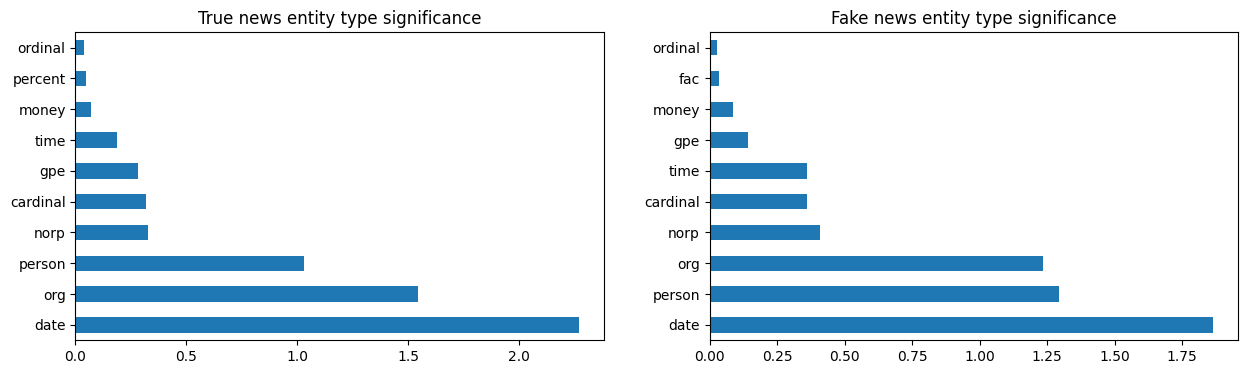

In [169]:
# Visualize TfIdf significance of news classes
ENT_sigfnc_true = pd.Series(ENT_train[df_train['news_label']==1].mean(axis=0), index= counts.get_feature_names_out())
ENT_sigfnc_fake = pd.Series(ENT_train[df_train['news_label']==0].mean(axis=0), index= counts.get_feature_names_out())

plt.figure(figsize=(15, 4))
ax1 = plt.subplot(1, 2, 1)
ENT_sigfnc_true.sort_values(ascending= False).head(10).plot.barh(ax= ax1, title='True news entity type significance')

ax2 = plt.subplot(1, 2, 2)
ENT_sigfnc_fake.sort_values(ascending= False).head(10).plot.barh(ax= ax2, title='Fake news entity type significance')

plt.show()

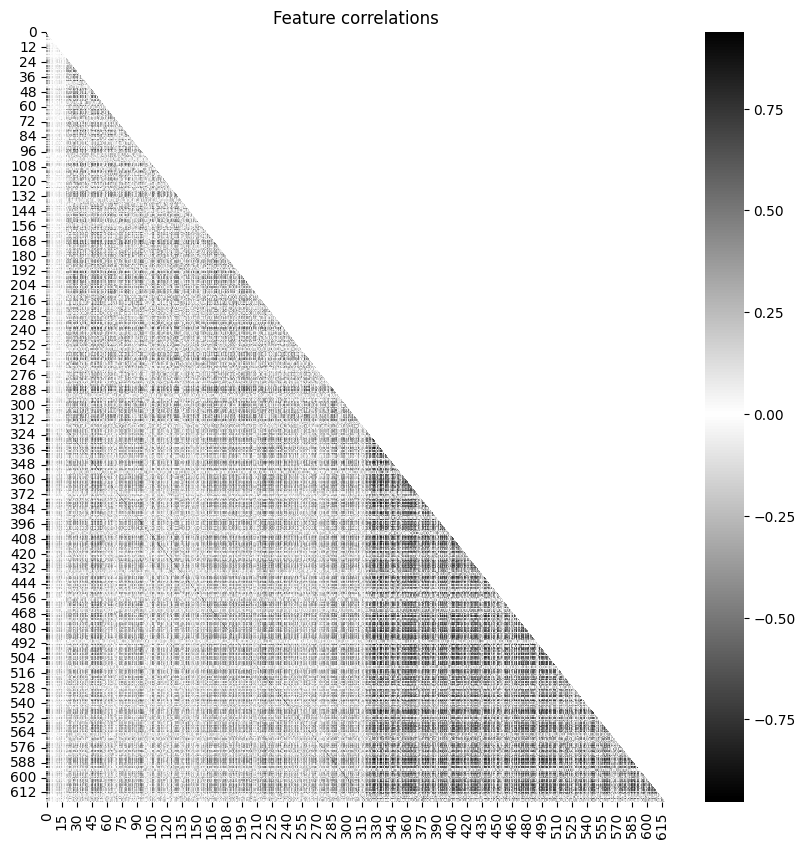

In [170]:
# Visualizing correlation between features
from matplotlib.colors import LinearSegmentedColormap

gray_scale = [
    (0, 'black'),
    (0.25, 'grey'),
    (0.5, 'white'),
    (0.75, 'grey'),
    (1.0, 'black')
    ]
custom_cmap = LinearSegmentedColormap.from_list('Heatmap_gray_scale', gray_scale)

df = pd.DataFrame(X_train).corr()

plt.figure(figsize=(10, 10))
plt.title('Feature correlations')
sns.heatmap(df, mask= np.triu(df), cmap= custom_cmap, center= 0)
plt.show()

## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [ ]:
## Initialise Logistic Regression model
log_reg = LogisticRegression(solver='liblinear', random_state= 22)
lr_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 0.01]
}

lr_grid = GridSearchCV(
    estimator= log_reg,
    param_grid= lr_params,
    scoring= 'f1',
    cv= 4,
    verbose= 1,
    n_jobs= -1
)

## Train Logistic Regression model on training data
lr_grid.fit(X_train, y_train)

## Predict on validation data
y_test_pred = lr_grid.predict(X_test)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


In [203]:
lr_grid.best_params_

{'C': 0.1, 'penalty': 'l1'}

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [204]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print(f'Accuracy: {accuracy_score(y_test, y_test_pred):.4f}')
print(f'Precision: {precision_score(y_test, y_test_pred):.4f}')
print(f'Recall: {recall_score(y_test, y_test_pred):.4f}')
print(f'F1 score: {f1_score(y_test, y_test_pred):.4f}')

Accuracy: 0.9163
Precision: 0.9059
Recall: 0.9200
F1 score: 0.9129


In [175]:
# Classification Report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7044
           1       0.91      0.92      0.91      6425

    accuracy                           0.92     13469
   macro avg       0.92      0.92      0.92     13469
weighted avg       0.92      0.92      0.92     13469



In [176]:
print(confusion_matrix(y_test, y_test_pred))

[[6430  614]
 [ 514 5911]]


### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [190]:
## Initialise Decision Tree model
tree = DecisionTreeClassifier(criterion='entropy', random_state= 44)
dt_params = {
    'min_samples_split': [6, 7],
    'min_samples_leaf': [1, 2]
}

dt_grid = GridSearchCV(
    estimator= tree,
    param_grid= dt_params,
    scoring= 'f1',
    cv= 4,
    verbose= 1,
    n_jobs= -1
)

## Train Decision Tree model on training data
dt_grid.fit(X_train, y_train)

## Predict on validation data
y_test_pred = dt_grid.predict(X_test)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


In [191]:
dt_grid.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 6}

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [192]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print(f'Accuracy: {accuracy_score(y_test, y_test_pred):.4f}')
print(f'Precision: {precision_score(y_test, y_test_pred):.4f}')
print(f'Recall: {recall_score(y_test, y_test_pred):.4f}')
print(f'F1 score: {f1_score(y_test, y_test_pred):.4f}')

Accuracy: 0.8396
Precision: 0.8416
Recall: 0.8176
F1 score: 0.8294


In [180]:
# Classification Report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      7044
           1       0.84      0.82      0.83      6425

    accuracy                           0.84     13469
   macro avg       0.84      0.84      0.84     13469
weighted avg       0.84      0.84      0.84     13469



In [181]:
print(confusion_matrix(y_test, y_test_pred))

[[6032 1012]
 [1166 5259]]


### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [196]:
## Initialise Random Forest model
rf = RandomForestClassifier(n_estimators=200, bootstrap= True, oob_score= True, criterion='entropy', random_state= 66)
rf_params = {
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [4, 5, 6],
}

rf_grid = GridSearchCV(
    estimator= rf,
    param_grid= rf_params,
    scoring= 'f1',
    cv= 4,
    verbose= 1,
    n_jobs= -1
)

## Train Random Forest model on training data
rf_grid.fit(X_train, y_train)

## Predict on validation data
y_test_pred = rf_grid.predict(X_test)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


In [197]:
rf_grid.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 5}

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [198]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print(f'Accuracy: {accuracy_score(y_test, y_test_pred):.4f}')
print(f'Precision: {precision_score(y_test, y_test_pred):.4f}')
print(f'Recall: {recall_score(y_test, y_test_pred):.4f}')
print(f'F1 score: {f1_score(y_test, y_test_pred):.4f}')

Accuracy: 0.9176
Precision: 0.9159
Recall: 0.9108
F1 score: 0.9134


In [199]:
# Classification Report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      7044
           1       0.92      0.91      0.91      6425

    accuracy                           0.92     13469
   macro avg       0.92      0.92      0.92     13469
weighted avg       0.92      0.92      0.92     13469



In [186]:
print(confusion_matrix(y_test, y_test_pred))

[[6477  567]
 [ 551 5874]]


## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

Assumptions:
- Sentence vector is assumed to be sum of all its word vectors. Vector sum summarizes each component of its constituent vectors. In sematic perspective, it is a singular representation of all the meaningful dimensions of its words.
- Sentence matrix is composed of all its word vectors. Frobenius norm of this matrix represents the volume of the matrix hyperspace. Larger the magnitude of its word vectors larger the volume. Semantically, larger volume represents more varied usage and conceptual significance. True news may have a more conceptually significant context.
- Word similarity is the dot product of the resultant along each dimension 
with the vector sum of all the words, taken across each dimension.
(resultant = word vectors (n_words x 300) sum axis = 1)
(dot product = resultant.T , word vectors (n_words x 300)) 
Semantically it represents how close each word is to the central meaning of the text. Thus, a high value of dot product indicates a more directed and purposeful context. Fake news may have a more purposeful context.
- Text lengths convey editing standards which is more significant in print media. Attempt has been made here to extend the same to digital media. High editing standards consider factors of readability like attention span, text volume first impression, distinction of key words etc. These influence text length. Fake news may lack such standards.
- Nouns in texts are typically used as subjects and objects of sentences and convey the semantic meaning of the context e.g. Elephant jungle may convey the context of elephant lives in a jungle. Thus, named entities attached to nouns also convey the theme of a text. True and fake news may display varying patterns and counts of named entities contained in them.

EDA findings:
1. Average word length of both true and fake news are similar. Both sets show double peaks, but the magnitude of peaks are opposite to the other. Spread of word lengths for fake news is more than true news. This shows lack of institutionalized editing standards in case of fake news. Thus word lenghts can be used as feature for model training.
2. The true news and fake news wordclouds and the respective entity type counts show that true news is more about geopolitical entities than persons. This shows that fake news target personalities more than actual facts. This characteristic can also be used for model training.
3. Top 10 trigrams for fake news contain subject matters and sources while that of true news more about political persons and geopolitical entities. This indicates that fake news are directed more towards convincing the consumers that delivering facts.

Approach to model building:
1. Cleaning text by removing punctuations, number, special characters and converting to lower case.
2. Lemmatizing text by keeping only the NN, NNS tags because nouns carry the most of the semantic sense of a text (many verbs are generated from nouns as well like, I googled the meaning of the term).
3. Creating word vectors by using word2vec-google-news-300 pre-trained model. It is a 300 dimension vector-model of 3 million words.
4. Extracting sentence vectors by taking the vector mean of all its words. Vector sum is the resultant of all the components of the vectors and averaging it will scale the resultant down to one word. This encapsulates all the semantic sense of the words in text into a single word.
5. Extracting the Frobenius norm of the sentence matrix composed of vectors of all its words and standardizing across all documents. This signifies the distance of the sentence matrix from origin.
6. Extracting the lemmatized text length and standardizing across all documents. Since length is a determining characteristic between true and fake news as per EDA.
7. Extracting the most common Named_Entity_Type from text and standardizing across all documents. Most common entity carries the main semantic theme of a text.
8. Hyper-parameters of the models are tuned using GridSearchCV

Evaluation metric: 
- F1 score is chosen as the best metric because it balances both precision and recall
- Since both target classes are more or less balanced, both precision and recall can be prioritised instead of only recall
- Mis-identifying true news as fake and fake news as true can be equally damaging to the reader

Impact
- Using standardized values (like standardized text lengths) causes faster convergence but reduces prediction power.
- Adding more features like word similarities, NER counts improve prediction power but increases training time.
- Adding more derived features increase multi-collinearity which adversely impacts logistic regression.

Best model: Random Forest (n_estimators= 200, min_samples_leaf= 1, min_samples_split= 5). 
- Accuracy: 91.76%, Precision: 91.59%, Recall: 91.08%, F1 score: 91.34%
- It has better performance than DecisionTree.
- It has marginally better performance than Logistic Regression which has a slightly better recall (92%) but lower accuracy (91.63%), lower precision (90.59%) and lower F1 score (91.29%).
- Higher precision means more confidence in the model.
- Unaffected by correlations between independent variables.
- Ensemble model and hence generalizes better to new input data.
- Flexible and adaptable to changing input data.
- But it is a high maintenance model which takes longer time to train and has more hyper-parameters to tune.